<a href="https://colab.research.google.com/github/saksters/Twittorials/blob/master/Analyzing_GSC_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) Ask Questions

**GSC - Site Impressions**
- What is the CTR curve for our search queries?
- What is the ranking distribution of our search queries?

**GSC - URL Impressions**
- What are the top 10 categories by Clicks on our site?
- What queries are experiencing cannibalization, meaning there is more than 1 URL ranking for that query?
- What pages are driving Clicks this year that did not drive Clicks in the previous period?

## 0.1) Pull Data
Once you know what questions you are trying to answer begin pulling the necessary data to start your data analysis. In this case, we will be using Google Search Console via Google Data Studio to answer all of the above questions.

https://datastudio.google.com/reporting/839fec64-dd0a-4a61-befc-8d8f8647842b/page/6zXD

## 0.2) Upload Files

In [2]:
from google.colab import files
upload = files.upload()

Saving search-console-landing-page-query-report.csv to search-console-landing-page-query-report.csv
Saving search-console-query-report.csv to search-console-query-report.csv


# GSC - Site Impressions

## 1) Import Libraries, and Read in CSV
Import the necessary libraries and read in the data that will be used for the analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_query = pd.read_csv("search-console-query-report.csv")
df_query.head()

,Query,Impressions,Δ,Clicks,Δ.1,Site CTR,Δ.2,Average Position,Δ.3
0,dino game,267205,266471.0,6343,6340.0,0.023738,0.019651,5.366101,-16.534444
1,dinosaur game,690784,690576.0,3658,3658.0,0.005295,0.005295,7.826005,-76.385534
2,youtube merchandise,4354,-3808.0,843,-908.0,0.193615,-0.020916,1.152733,-0.022101
3,google merchandise store,14050,-30992.0,805,-608.0,0.057295,0.025925,1.278648,0.053325
4,chrome dino game,83129,82968.0,681,681.0,0.008192,0.008192,7.705843,-40.157511


In [4]:
# Returns the number of rows and columns the dataset has.
df_query.shape

(22216, 9)

## 2) Clean the Data
Clean the data up to make it easier for an analysis. This includes removing null values, renaming columns, and having the right data types. 

In [ ]:
# Rename columns to your preference
df_query = df_query.rename(columns={"Δ": "Impressions Difference", "Δ.1": "Clicks Difference", "Δ.2":"Site CTR Difference", "Δ.3":"Average Position Difference"})
df_query.head()

,Query,Impressions,Impressions Difference,Clicks,Clicks Difference,Site CTR,Site CTR Difference,Average Position,Average Position Difference
0,dino game,267205,266471.0,6343,6340.0,0.023738,0.019651,5.366101,-16.534444
1,dinosaur game,690784,690576.0,3658,3658.0,0.005295,0.005295,7.826005,-76.385534
2,youtube merchandise,4354,-3808.0,843,-908.0,0.193615,-0.020916,1.152733,-0.022101
3,google merchandise store,14050,-30992.0,805,-608.0,0.057295,0.025925,1.278648,0.053325
4,chrome dino game,83129,82968.0,681,681.0,0.008192,0.008192,7.705843,-40.157511


In [ ]:
# Check for null values in the dataset
df_query.isnull().sum()

Query                              0
Impressions                        0
Impressions Difference         13266
Clicks                             0
Clicks Difference              13266
Site CTR                           0
Site CTR Difference            13266
Average Position                   0
Average Position Difference    13266
dtype: int64

In [ ]:
# Filters to rows where Impressions Difference has a null value
df_query[df_query['Impressions Difference'].isnull()]

,Query,Impressions,Impressions Difference,Clicks,Clicks Difference,Site CTR,Site CTR Difference,Average Position,Average Position Difference
54,google zip hoodie f/c,141,NaN,45,NaN,0.319149,NaN,1.000000,NaN
75,google swag 2020,157,NaN,31,NaN,0.197452,NaN,2.656051,NaN
94,머천다이즈 스토어,36,NaN,24,NaN,0.666667,NaN,1.000000,NaN
96,google cloud certification swag,68,NaN,23,NaN,0.338235,NaN,1.720588,NaN
109,/google+redesign/apparel/mens/quickview,33,NaN,20,NaN,0.606061,NaN,1.000000,NaN
...,...,...,...,...,...,...,...,...,...
22203,notebook google shopping,1,NaN,0,NaN,0.000000,NaN,11.000000,NaN
22205,petcollar,10,NaN,0,NaN,0.000000,NaN,11.800000,NaN
22206,no internet t rex game,13,NaN,0,NaN,0.000000,NaN,42.615385,NaN
22208,crew neck sweatshirt navy,2,NaN,0,NaN,0.000000,NaN,10.000000,NaN


In [ ]:
# Replace all null values in the data set with 0
df_query = df_query.fillna(0)
df_query.isnull().sum()

Query                          0
Impressions                    0
Impressions Difference         0
Clicks                         0
Clicks Difference              0
Site CTR                       0
Site CTR Difference            0
Average Position               0
Average Position Difference    0
dtype: int64

In [ ]:
df_query.dtypes

Query                           object
Impressions                      int64
Impressions Difference         float64
Clicks                           int64
Clicks Difference              float64
Site CTR                       float64
Site CTR Difference            float64
Average Position               float64
Average Position Difference    float64
dtype: object

In [ ]:
df_query['Impressions Difference'] = df_query['Impressions Difference'].astype('int64')
df_query['Clicks Difference'] = df_query['Clicks Difference'].astype('int64')
df_query.dtypes

Query                           object
Impressions                      int64
Impressions Difference           int64
Clicks                           int64
Clicks Difference                int64
Site CTR                       float64
Site CTR Difference            float64
Average Position               float64
Average Position Difference    float64
dtype: object

## 3) Derive New Columns and Dataframes
Create values from the existing data to help with the analysis, such as a rounded position column or breaking down brand and a non-brand into separate dataframes.

In [ ]:
# Creates a new column that rounds the Average Position.
df_query['Rounded Position'] = df_query['Average Position'].round(0).astype('int64')
df_query.head()

,Query,Impressions,Impressions Difference,Clicks,Clicks Difference,Site CTR,Site CTR Difference,Average Position,Average Position Difference,Rounded Position
0,dino game,267205,266471,6343,6340,0.023738,0.019651,5.366101,-16.534444,5
1,dinosaur game,690784,690576,3658,3658,0.005295,0.005295,7.826005,-76.385534,8
2,youtube merchandise,4354,-3808,843,-908,0.193615,-0.020916,1.152733,-0.022101,1
3,google merchandise store,14050,-30992,805,-608,0.057295,0.025925,1.278648,0.053325,1
4,chrome dino game,83129,82968,681,681,0.008192,0.008192,7.705843,-40.157511,8


In [ ]:
# Creates new columns for the value of the previous period, given we only have the data 
# for the current period and the absolute change. 
df_query['Impressions (Prior Period)'] = (df_query['Impressions'] - df_query['Impressions Difference'])
df_query['Clicks (Prior Period)'] = (df_query['Clicks'] - df_query['Clicks Difference'])
df_query['Site CTR (Prior Period)'] = (df_query['Site CTR'] - df_query['Site CTR Difference'])
df_query.head()

,Query,Impressions,Impressions Difference,Clicks,Clicks Difference,Site CTR,Site CTR Difference,Average Position,Average Position Difference,Rounded Position,Impressions (Prior Period),Clicks (Prior Period),Site CTR (Prior Period)
0,dino game,267205,266471,6343,6340,0.023738,0.019651,5.366101,-16.534444,5,734,3,0.004087
1,dinosaur game,690784,690576,3658,3658,0.005295,0.005295,7.826005,-76.385534,8,208,0,0.000000
2,youtube merchandise,4354,-3808,843,-908,0.193615,-0.020916,1.152733,-0.022101,1,8162,1751,0.214531
3,google merchandise store,14050,-30992,805,-608,0.057295,0.025925,1.278648,0.053325,1,45042,1413,0.031371
4,chrome dino game,83129,82968,681,681,0.008192,0.008192,7.705843,-40.157511,8,161,0,0.000000


In [ ]:
# Create a function for brand vs. non-brand and apply it to a new column. 
def brand_non_brand(x):
    if 'google' in x:
        return 'Brand'
    else:
        return 'Non-Brand'

df_query['Brand vs. Non-Brand'] = df_query['Query'].apply(brand_non_brand)
df_query.head()

,Query,Impressions,Impressions Difference,Clicks,Clicks Difference,Site CTR,Site CTR Difference,Average Position,Average Position Difference,Rounded Position,Impressions (Prior Period),Clicks (Prior Period),Site CTR (Prior Period),Brand vs. Non-Brand
0,dino game,267205,266471,6343,6340,0.023738,0.019651,5.366101,-16.534444,5,734,3,0.004087,Non-Brand
1,dinosaur game,690784,690576,3658,3658,0.005295,0.005295,7.826005,-76.385534,8,208,0,0.000000,Non-Brand
2,youtube merchandise,4354,-3808,843,-908,0.193615,-0.020916,1.152733,-0.022101,1,8162,1751,0.214531,Non-Brand
3,google merchandise store,14050,-30992,805,-608,0.057295,0.025925,1.278648,0.053325,1,45042,1413,0.031371,Brand
4,chrome dino game,83129,82968,681,681,0.008192,0.008192,7.705843,-40.157511,8,161,0,0.000000,Non-Brand


## 4) Analysis

### CTR Curve
Aggregates the data into pivot tables to create a CTR curve.

##### Total Site

In [ ]:
# Creates a pivot table that averages the Site CTR by the Rounded Position. 
ctr_pivot = df_query.pivot_table(index=('Rounded Position'), values=['Site CTR'], aggfunc={'Site CTR':"mean"}).sort_values(by=['Rounded Position'], ascending=True)
ctr_pivot.head(10)

,Site CTR
Rounded Position,
1,0.078830
2,0.040984
3,0.031735
4,0.017104
5,0.016742
6,0.014567
7,0.008865
8,0.004700
9,0.004094


Text(0.5, 1.0, 'Total Site CTR Curve')

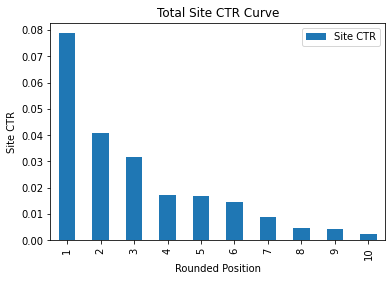

In [ ]:
ax = ctr_pivot.head(10).plot(kind='bar')
ax.set_ylabel('Site CTR')
ax.set_title('Total Site CTR Curve')

##### Brand

In [ ]:
brand_ctr_pivot = df_query[df_query['Brand vs. Non-Brand']=='Brand'].pivot_table(index=('Rounded Position'), values=['Site CTR'], aggfunc={'Site CTR':"mean"}).sort_values(by=['Rounded Position'], ascending=True)
brand_ctr_pivot.head(10)

,Site CTR
Rounded Position,
1,0.135134
2,0.064552
3,0.042728
4,0.020394
5,0.016122
6,0.016205
7,0.015246
8,0.005813
9,0.004070


Text(0.5, 1.0, 'Brand Site CTR Curve')

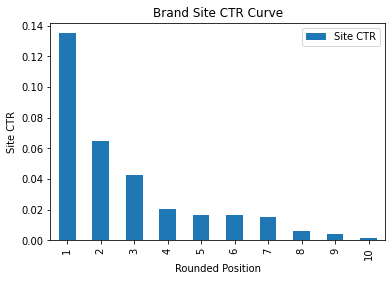

In [ ]:
ax_brand = brand_ctr_pivot.head(10).plot(kind='bar')
ax_brand.set_ylabel('Site CTR')
ax_brand.set_title('Brand Site CTR Curve')

##### Non-Brand

In [ ]:
non_brand_ctr_pivot = df_query[df_query['Brand vs. Non-Brand']=='Non-Brand'].pivot_table(index=('Rounded Position'), values=['Site CTR'], aggfunc={'Site CTR':"mean"}).sort_values(by=['Rounded Position'], ascending=True)
non_brand_ctr_pivot.head(10)

,Site CTR
Rounded Position,
1,0.031178
2,0.026921
3,0.026712
4,0.015410
5,0.017015
6,0.013558
7,0.005378
8,0.004243
9,0.004102


Text(0.5, 1.0, 'Non-Brand CTR Curve')

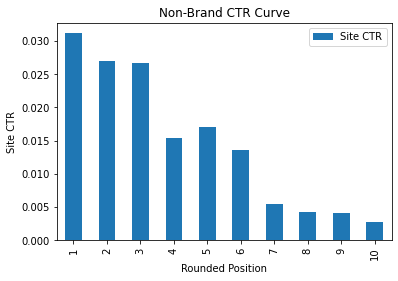

In [ ]:
ax_non_brand = non_brand_ctr_pivot.head(10).plot(kind='bar')
ax_non_brand.set_ylabel('Site CTR')
ax_non_brand.set_title('Non-Brand CTR Curve')

### Ranking Distribution

##### Total Site

In [ ]:
total_ranking_pivot = df_query.pivot_table(index=('Rounded Position'), values=['Query'], aggfunc={'Query':"count"}).sort_values(by=['Rounded Position'], ascending=True)
total_ranking_pivot.head(20)

,Query
Rounded Position,
1,877
2,388
3,338
4,359
5,448
6,635
7,849
8,1528
9,1328


Text(0.5, 1.0, 'Ranking Distribution')

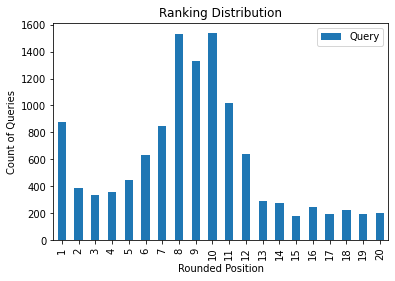

In [ ]:
ax = total_ranking_pivot.head(20).plot(kind='bar')
ax.set_ylabel('Count of Queries')
ax.set_title('Ranking Distribution')

##### Brand

In [ ]:
brand_ranking_pivot = df_query[df_query['Brand vs. Non-Brand']=='Brand'].pivot_table(index=('Rounded Position'), values=['Query'], aggfunc={'Query':"count"}).sort_values(by=['Rounded Position'], ascending=True)
brand_ranking_pivot.head(20)

,Query
Rounded Position,
1,402
2,145
3,106
4,122
5,137
6,242
7,300
8,445
9,348


Text(0.5, 1.0, 'Brand Ranking Distribution')

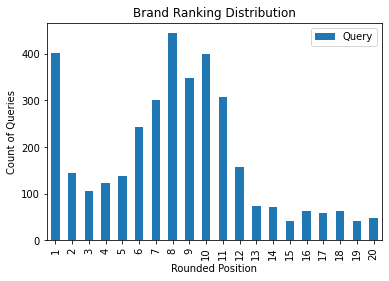

In [ ]:
ax = brand_ranking_pivot.head(20).plot(kind='bar')
ax.set_ylabel('Count of Queries')
ax.set_title('Brand Ranking Distribution')

##### Non-Brand

In [ ]:
non_brand_ranking_pivot = df_query[df_query['Brand vs. Non-Brand']=='Non-Brand'].pivot_table(index=('Rounded Position'), values=['Query'], aggfunc={'Query':"count"}).sort_values(by=['Rounded Position'], ascending=True)
non_brand_ranking_pivot.head(20)

,Query
Rounded Position,
1,475
2,243
3,232
4,237
5,311
6,393
7,549
8,1083
9,980


Text(0.5, 1.0, 'Non-Brand Ranking Distribution')

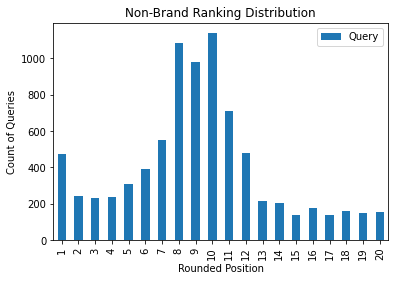

In [ ]:
ax = non_brand_ranking_pivot.head(20).plot(kind='bar')
ax.set_ylabel('Count of Queries')
ax.set_title('Non-Brand Ranking Distribution')

# GSC - URL Impressions

## 1) Import Libraries and Read in CSV
Import the necessary libraries and read in the data that will be used for the analysis.

In [5]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

df_lp_query = pd.read_csv("search-console-landing-page-query-report.csv")
df_lp_query.head()

,Landing Page,Query,Impressions,Δ,Url Clicks,Δ.1,URL CTR,Δ.2
0,https://shop.googlemerchandisestore.com/Google...,dino game,267205,266575.0,6343,6340.0,0.023738,0.018976
1,https://shop.googlemerchandisestore.com/Google...,dinosaur game,690783,690754.0,3658,3658.0,0.005295,0.005295
2,https://shop.googlemerchandisestore.com/Google...,youtube merchandise,4354,-3808.0,843,-907.0,0.193615,-0.020793
3,https://shop.googlemerchandisestore.com/Google...,chrome dino game,83122,83121.0,681,681.0,0.008193,0.008193
4,https://shop.googlemerchandisestore.com/Google...,google dinosaur game,97448,97405.0,676,676.0,0.006937,0.006937


In [6]:
df_lp_query.shape

(44169, 8)

## 2) Clean the Data
Clean the data up to make it easier for an analysis. This includes removing null values, renaming columns, and having the right data types. 

In [7]:
# Rename columns to your preference
df_lp_query = df_lp_query.rename(columns={"Url Clicks":"URL Clicks","Δ": "Impressions Difference", "Δ.1": "URL Clicks Difference", "Δ.2":"URL CTR Difference", "Δ.3":"Average Position Difference"})

# Replace all null values in the data set with 0
df_lp_query = df_lp_query.fillna(0)
df_lp_query.isnull().sum()

# Cast columns as int64 data type
df_lp_query['Impressions Difference'] = df_lp_query['Impressions Difference'].astype('int64')
df_lp_query['URL Clicks Difference'] = df_lp_query['URL Clicks Difference'].astype('int64')

## 3) Derive New Columns and Dataframes

In [ ]:
# Added a style to the Landing Page column so that we can see the full URL
df_lp_query.head().style.set_properties(subset=['Landing Page'], **{'width': '100px'})

,Landing Page,Query,Impressions,Impressions Difference,URL Clicks,URL Clicks Difference,URL CTR,URL CTR Difference
0,https://shop.googlemerchandisestore.com/Google+Redesign/Apparel/Google+Dino+Game+Tee,dino game,267205,266575,6343,6340,0.023738,0.018976
1,https://shop.googlemerchandisestore.com/Google+Redesign/Apparel/Google+Dino+Game+Tee,dinosaur game,690783,690754,3658,3658,0.005295,0.005295
2,https://shop.googlemerchandisestore.com/Google+Redesign/Shop+by+Brand/YouTube,youtube merchandise,4354,-3808,843,-907,0.193615,-0.020793
3,https://shop.googlemerchandisestore.com/Google+Redesign/Apparel/Google+Dino+Game+Tee,chrome dino game,83122,83121,681,681,0.008193,0.008193
4,https://shop.googlemerchandisestore.com/Google+Redesign/Apparel/Google+Dino+Game+Tee,google dinosaur game,97448,97405,676,676,0.006937,0.006937


In [ ]:
# Extracts string after the 4th forward slash and puts the value into a Category column. 
df_lp_query['Category']=df_lp_query['Landing Page'].str.extract(r'(?:.*?\/){4}([^\/?#]+)')

# Replaces all + and - in the extracted string with a space and makes it title case.
df_lp_query['Category']=df_lp_query['Category'].str.replace('+', ' ')
df_lp_query['Category']=df_lp_query['Category'].str.replace('-', ' ').str.title()
df_lp_query.head().style.set_properties(subset=['Landing Page'], **{'width': '100px'})

,Landing Page,Query,Impressions,Impressions Difference,URL Clicks,URL Clicks Difference,URL CTR,URL CTR Difference,Category
0,https://shop.googlemerchandisestore.com/Google+Redesign/Apparel/Google+Dino+Game+Tee,dino game,267205,266575,6343,6340,0.023738,0.018976,Apparel
1,https://shop.googlemerchandisestore.com/Google+Redesign/Apparel/Google+Dino+Game+Tee,dinosaur game,690783,690754,3658,3658,0.005295,0.005295,Apparel
2,https://shop.googlemerchandisestore.com/Google+Redesign/Shop+by+Brand/YouTube,youtube merchandise,4354,-3808,843,-907,0.193615,-0.020793,Shop By Brand
3,https://shop.googlemerchandisestore.com/Google+Redesign/Apparel/Google+Dino+Game+Tee,chrome dino game,83122,83121,681,681,0.008193,0.008193,Apparel
4,https://shop.googlemerchandisestore.com/Google+Redesign/Apparel/Google+Dino+Game+Tee,google dinosaur game,97448,97405,676,676,0.006937,0.006937,Apparel


In [ ]:
# Creates 2 new dataframes, one for brand queries and one for non-brand queries.
df_lp_query_brand = df_lp_query[df_lp_query['Query'].str.contains('google')]
df_lp_query_non_brand = df_lp_query[~df_lp_query['Query'].str.contains('google')]

## 4) Analysis

### Top 10 Categories by Clicks

##### Total Site

In [ ]:
category_pivot = df_lp_query.pivot_table(index='Category', values=['URL Clicks'], aggfunc={'URL Clicks': np.sum})
category_pivot = category_pivot.sort_values(by='URL Clicks', ascending=False)
category_pivot.head(10)

,URL Clicks
Category,
Apparel,18063
Shop By Brand,3131
Accessories,1197
Stationery,604
Bags,477
Drinkware,302
Frequently Asked Questions,187
Lifestyle,150
Clearance,110


Text(0.5, 1.0, 'Top 10 URL Clicks by Category')

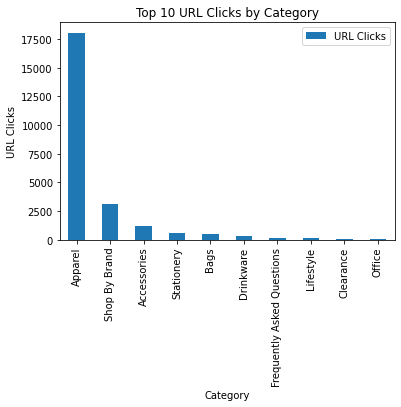

In [ ]:
ax_category = category_pivot.head(10).plot(kind='bar')
ax_category.set_ylabel('URL Clicks')
ax_category.set_title('Top 10 URL Clicks by Category')

##### Brand Queries

In [ ]:
brand_category_pivot = df_lp_query_brand.pivot_table(index='Category', values=['URL Clicks'], aggfunc={'URL Clicks': np.sum})
brand_category_pivot = brand_category_pivot.sort_values(by='URL Clicks', ascending=False)
brand_category_pivot.head(10)

,URL Clicks
Category,
Apparel,5312
Accessories,847
Stationery,537
Bags,449
Drinkware,269
Frequently Asked Questions,183
Lifestyle,143
Shop By Brand,119
Clearance,109


Text(0.5, 1.0, 'Top 10 Brand URL Clicks by Category')

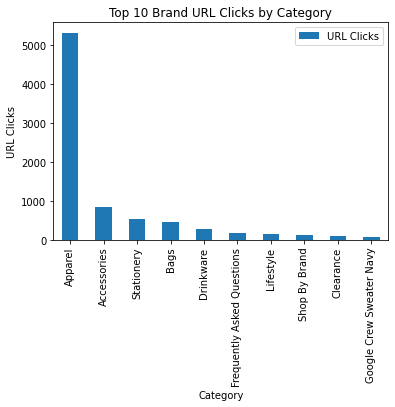

In [ ]:
ax_category = brand_category_pivot.head(10).plot(kind='bar')
ax_category.set_ylabel('URL Clicks')
ax_category.set_title('Top 10 Brand URL Clicks by Category')

##### Non-Brand Queries

In [ ]:
non_brand_category_pivot = df_lp_query_non_brand.pivot_table(index='Category', values=['URL Clicks'], aggfunc={'URL Clicks': np.sum})
non_brand_category_pivot = non_brand_category_pivot.sort_values(by='URL Clicks', ascending=False)
non_brand_category_pivot.head(10)

,URL Clicks
Category,
Apparel,12751
Shop By Brand,3012
Accessories,350
Stationery,67
Store Policies,49
Office,35
Drinkware,33
Bags,28
Campus Collection,9


Text(0.5, 1.0, 'Top 10 Non-Brand URL Clicks by Category')

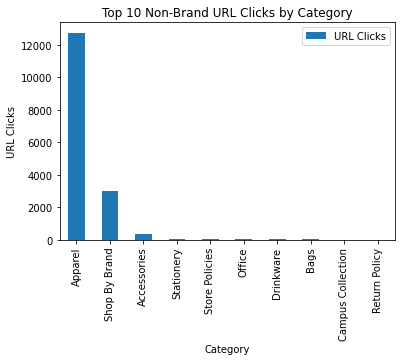

In [ ]:
ax_category = non_brand_category_pivot.head(10).plot(kind='bar')
ax_category.set_ylabel('URL Clicks')
ax_category.set_title('Top 10 Non-Brand URL Clicks by Category')

### Keyword Cannibalization

In [ ]:
pivot_brand_keyword_cannibalization = df_lp_query_brand.pivot_table(index='Query', values=['Landing Page'], aggfunc={'Landing Page': 'count'})
pivot_brand_keyword_cannibalization = pivot_brand_keyword_cannibalization.sort_values(by='Landing Page', ascending=False)
pivot_brand_keyword_cannibalization.head(10)

,Landing Page
Query,
site:shop.googlemerchandisestore.com,105
site:googlemerchandisestore.com,104
google merchandise store,50
shop.googlemerchandisestore,45
google merch,36
google shirt,34
googlemerchandisestore.com,33
shop.googlemerchandisestore.com,33
google merchandise,33


In [ ]:
# pivot_non_brand_keyword_cannibalization = df_lp_query_non_brand.pivot_table(index={'Query', 'Landing Page'}, values=['URL Clicks'], aggfunc={'URL Clicks': np.sum})
pivot_non_brand_keyword_cannibalization = df_lp_query_non_brand.pivot_table(index={'Query'}, values=['Landing Page','URL Clicks'], aggfunc={'Landing Page':'count', 'URL Clicks': np.sum})
pivot_non_brand_keyword_cannibalization = pivot_non_brand_keyword_cannibalization.sort_values(by='Landing Page', ascending=False)
pivot_non_brand_keyword_cannibalization.head(10)

,Landing Page,URL Clicks
Query,,
merchandise store,31,27
merchandise.com,25,2
merchandise,24,2
the merchandise store,21,0
shop merchandise,19,1
merchandise shop,19,4
store merchandise,18,0
merchandise website,18,1
home merchandise,18,0
